# Validação de modelos de clusterização

### 1. Infraestrutura

##### 1. Você está rodando em Python 3.9+:

- Sim, a versão que utilizei no projeto foi a 3.10.12.

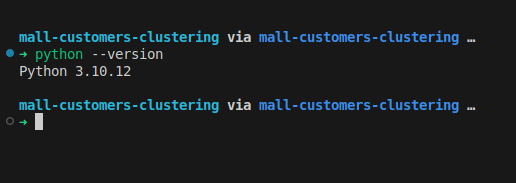

##### 2. Você está usando um ambiente virtual: Virtualenv ou Anaconda:

- Sim, a imagem abaixo informa o caminho que o ambiente virtual está sendo executado.

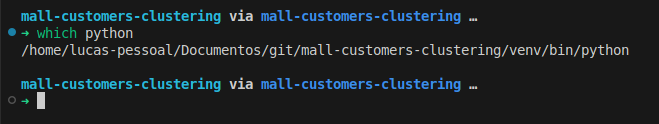

##### 3. Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico:

- Sim, todas as bibliotecas usadas foram instaladas no ambiente virtual.

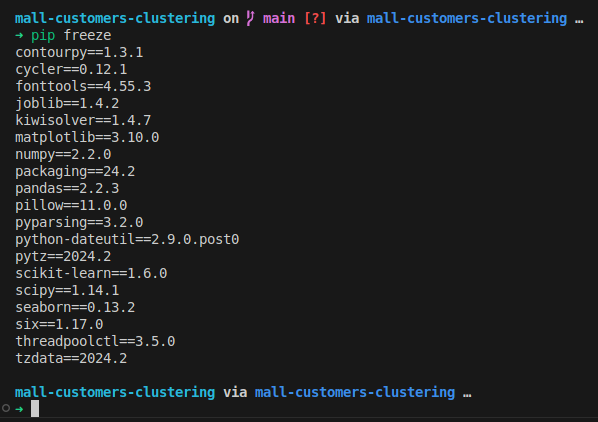

##### 4. Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.

- Os pacotes foram salvos em um arquivo (requirements.txt) que está disponível no repositório.

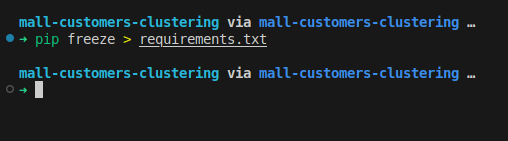

##### 5. Tire um printscreen do ambiente que será usado rodando em sua máquina.

- Abaixo imagem que mostra o ambiente em execução.

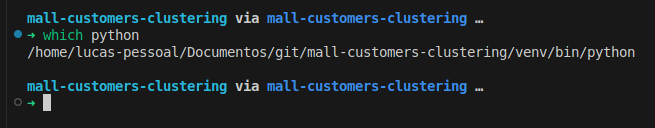

##### 6. Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle).

- Segue link para o repositório do github lá é possível encontrar toda a documentação para execução do projeto: https://github.com/lucasmaiamoreira/mall-customers-clustering
